In [ ]:

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

file_path = '/content/drive/MyDrive/Colab Notebooks/software_engineer_salary_prediction_dataset (1).csv'
df = pd.read_csv(file_path)

df.head()


,EngineerID,Age,Gender,YearsOfExperience,Degree,CollegeTier,AcademicScore,City,Skillsets,Certifications,CompanySize,IndustryDomain,WorkHoursPerWeek,Salary
0,1,26,Male,10,Master,Tier 3,61.95,Chennai,Data Science,0,Mid-size,IT Services,49,1657108.11
1,2,38,Female,14,Master,Tier 2,77.99,Hyderabad,Python,9,Startup,Healthcare,55,2796495.56
2,3,28,Female,11,PhD,Tier 2,68.30,Pune,Python,0,Startup,Healthcare,51,2237499.62
3,4,24,Female,2,Master,Tier 1,84.80,Pune,Data Science,0,Mid-size,IT Services,59,1192647.39
4,5,44,Female,15,Bachelor,Tier 1,62.05,Chennai,Cloud Computing,0,Startup,Consulting,45,1772396.50


In [ ]:

df.isnull().sum()

df['AcademicScore'].fillna(df['AcademicScore'].mean(), inplace=True)
df['Certifications'].fillna(df['Certifications'].mean(), inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['CompanySize'] = le.fit_transform(df['CompanySize'])
df['Degree'] = le.fit_transform(df['Degree'])
df['City'] = le.fit_transform(df['City'])
df['Skillsets'] = le.fit_transform(df['Skillsets'])
df['IndustryDomain'] = le.fit_transform(df['IndustryDomain'])




In [ ]:
X = df[['Degree', 'AcademicScore', 'Skillsets', 'Certifications', 'YearsOfExperience', 'CollegeTier', 'City', 'CompanySize', 'WorkHoursPerWeek']]  # Include more variables as needed
y = df['Salary']



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf = rf_reg.predict(X_test_scaled)


In [ ]:
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Random Forest Performance:
Mean Absolute Error (MAE): 691616.2160424
Mean Squared Error (MSE): 645014919797.5737
R-squared (R2): -0.03687134840908257


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_reg.feature_importances_
feature_names = X.columns


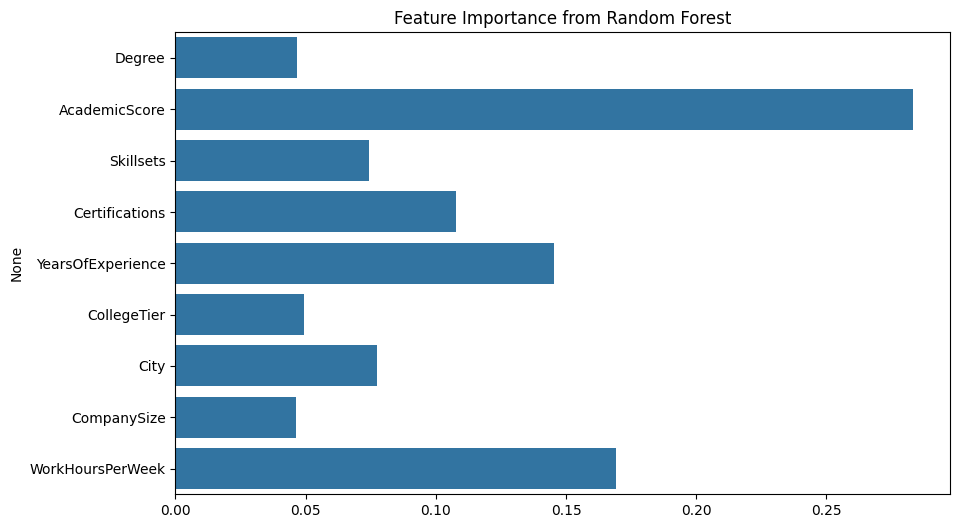

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance from Random Forest')
plt.show()

**Insights and Recommendations:**
Based on the model's analysis, several key factors appear to significantly influence the salaries of software engineers. Notably, Years of Experience stands out as one of the most important factors, indicating that more experienced engineers generally command higher salaries. This finding is consistent with industry trends, as experience typically brings advanced skills, deeper problem-solving abilities, and leadership capabilities. Similarly, Skillsets such as expertise in high-demand technologies like cloud computing, data science, and programming languages like Python and Java significantly impact salary levels. Engineers proficient in these in-demand areas tend to earn higher salaries compared to those with more generic or less specialized skills. Additionally, the College Tier from which an engineer graduates also plays a role, with graduates from Tier 1 colleges often receiving higher salaries, possibly due to better recruitment opportunities and the perception of superior training. Finally, factors such as Certifications and Academic Performance (GPA) also have moderate impacts, with certifications providing validation of specific competencies and a high GPA reflecting strong academic discipline, both of which can contribute to higher salary offers.

**Actionable Strategies:**
To optimize their career paths and increase salary potential, engineers should focus on developing in-demand technical skills such as cloud technologies, artificial intelligence, data science, and software development frameworks. Keeping pace with industry trends through continuous learning and acquiring professional certifications in these fields can provide a competitive edge and open doors to higher-paying opportunities. Engineers early in their careers should aim to gain more practical experience, either through internships, freelance projects, or open-source contributions, to build a portfolio that demonstrates their ability to apply skills in real-world settings. Additionally, networking within industry circles, attending technical conferences, and leveraging platforms like GitHub or LinkedIn can increase visibility to potential employers. For those still in or entering college, targeting Tier 1 institutions or seeking advanced degrees (Master’s or PhD) from reputable schools can improve long-term salary prospects. Finally, engineers should also prioritize roles in high-paying cities such as Bangalore, Hyderabad, or Pune, where tech demand is high, and the size and domain of the company—working in large tech firms or fast-growing domains like E-commerce or IT Services can further enhance salary potential.